In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as mb
import lsst.sims.maf.plots as plots

In [4]:
# Connect to the opsim database
dbdir = '/Users/lynnej/opsim/fbs_1.5_db/'
runName = 'baseline_v1.5_10yrs'

opsdb = db.OpsimDatabase(os.path.join(dbdir, runName + ".db"))

In [7]:
# Set up the metric and slicer, then metricBundle, for a simple 'count number of visits across the sky' metric
# but at varying nsides

nsides = (4, 8, 16, 32)
m = metrics.CountMetric(col='observationStartMJD', metricName='Nvisits')

summaryStats = [metrics.CountMetric(metricName='npixels'), 
                metrics.MedianMetric(), metrics.MeanMetric(),
                metrics.MinMetric(), metrics.MaxMetric()]

bundles = {}
for nside in nsides:
    s = slicers.HealpixSlicer(nside=nside)
    bundles[nside] = mb.MetricBundle(m, s, constraint=None, runName=runName,
                                    summaryMetrics=summaryStats)

Healpix slicer using NSIDE=4, approximate resolution 879.484521 arcminutes
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


In [9]:
# Run the metrics and save them to outDir
outDir = 'nside_test'
resultsDb = db.ResultsDb(outDir)
g = mb.MetricBundleGroup(bundles, opsdb, outDir=outDir, resultsDb=resultsDb)
g.runAll()

Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'observationStartMJD', 'fieldRA'].
Found 2224095 visits
Running:  [4]
Completed metric generation.
Running:  [8]
Completed metric generation.
Running:  [16]
Completed metric generation.
Running:  [32]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/lynnej/lsst_stack/stack/miniconda3-4.7.12-984c9f7/DarwinX86/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-macosx-10.9-x86_64.egg/healpy/projaxes.py:1027: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/Users/lynnej/lsst_stack/stack/miniconda3-4.7.12-984c9f7/DarwinX86/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-macosx-10.9-x86_64.egg/healpy/projaxes.py:1027: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/Users/lynnej/lsst_stack/stack/miniconda3-4.7.12-984c9f7/DarwinX86/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-macosx-10.9-x86_64.egg/healpy/projaxes.py:1027: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
 

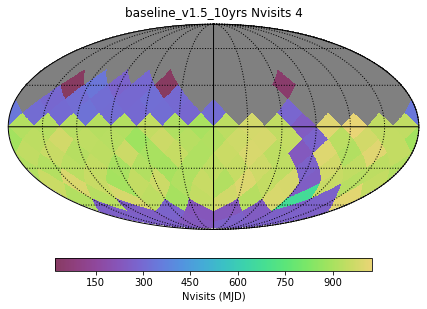

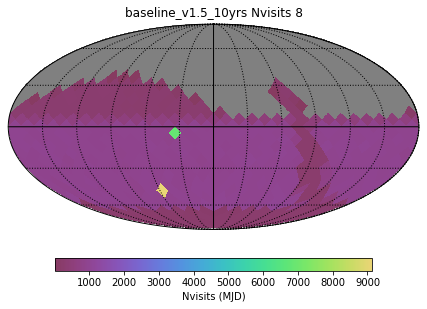

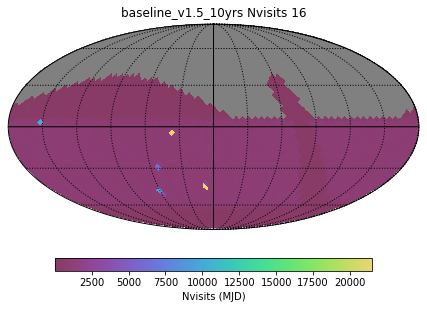

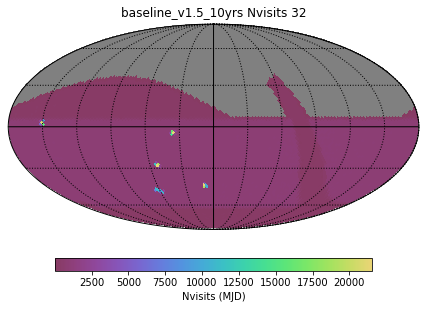

In [12]:
# Okay - let's plot them, first without any plot limits.
# Plot only the skymap .. 
plotFunc = plots.HealpixSkyMap()
for nside in nsides:
    plotDict = {'title': f'{runName} Nvisits {nside}'}
    bundles[nside].setPlotDict(plotDict)
    bundles[nside].plot(plotFunc=plotFunc)

In the plots above, you can see that the limits on the colorbar change significantly from one to the next. That is because the default is to set the range based on the range of metric values. Note that the slicer evaluates the metric (the number of visits) *AT* each of the healpix grid points. So at each RA/Dec value that matches a grid (slicer) point, what the metric does is calculate "how many visits overlap this point in the sky?". 

If the grid is coarser, then the grid points are spaced further apart. The metric still does the same thing -- how many visits overlap this point in the sky? But now this is evaluated on a coarser basis. 

Thus, we see for the nside = 4 example, the healpix slicer grid points don't happen to land on a DD field. Then the max value for the range of metric results changes. The median doesn't significantly.

In [14]:
for nside in nsides:
    print(f'{nside} {bundles[nside].summaryValues}')

4 {'npixels': 126, 'Median': 929.0, 'Mean': 730.1904761904761, 'Min': 20.0, 'Max': 1026.0}
8 {'npixels': 509, 'Median': 934.0, 'Mean': 764.0825147347741, 'Min': 4.0, 'Max': 9139.0}
16 {'npixels': 2032, 'Median': 934.0, 'Mean': 770.5605314960629, 'Min': 5.0, 'Max': 21509.0}
32 {'npixels': 8117, 'Median': 977.0, 'Mean': 800.7402981397067, 'Min': 8.0, 'Max': 21552.0}


/Users/lynnej/lsst_stack/stack/miniconda3-4.7.12-984c9f7/DarwinX86/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-macosx-10.9-x86_64.egg/healpy/projaxes.py:1027: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/Users/lynnej/lsst_stack/stack/miniconda3-4.7.12-984c9f7/DarwinX86/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-macosx-10.9-x86_64.egg/healpy/projaxes.py:1027: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/Users/lynnej/lsst_stack/stack/miniconda3-4.7.12-984c9f7/DarwinX86/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-macosx-10.9-x86_64.egg/healpy/projaxes.py:1027: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
 

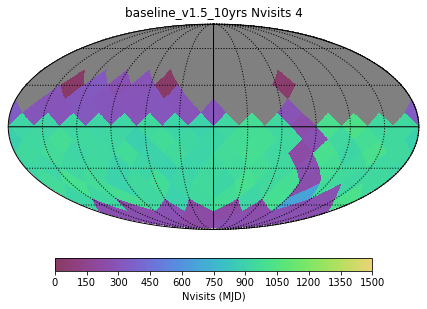

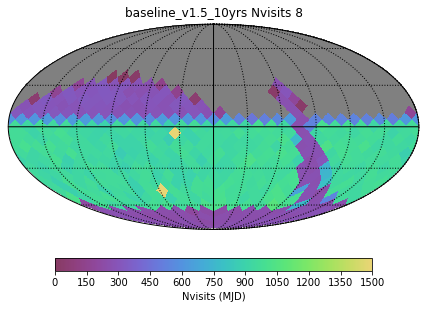

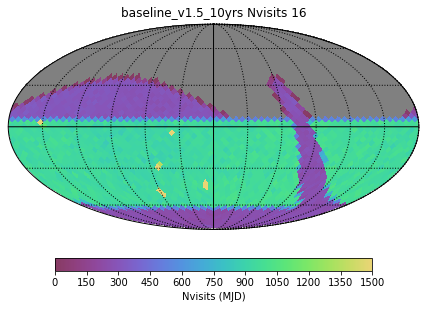

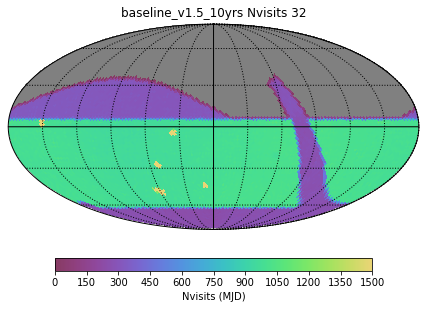

In [16]:
# Okay - so now replot the skymap, but setting the color-bar limits explicitly (and the same each time)
plotFunc = plots.HealpixSkyMap()
for nside in nsides:
    plotDict = {'title': f'{runName} Nvisits {nside}',
               'colorMin': 0, 'colorMax': 1500}
    bundles[nside].setPlotDict(plotDict)
    bundles[nside].plot(plotFunc=plotFunc)